In [1]:
%pylab inline
from champ.sim import multiXCGVF, multiXC

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from champ.utils import ShapeGen

In [7]:
shape_dict = {'name': 'trapezoid', 'bottom_width':1, 'side_slope':1, 'height':5}

In [8]:
shape_dict.pop('name')
shape_dict

{'bottom_width': 1, 'side_slope': 1, 'height': 5}

In [9]:
func_string = 'ShapeGen.' + 'genTrap' + '(**shape_dict)'


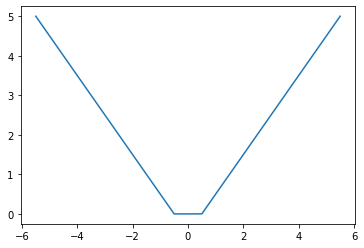

In [10]:
x,y = eval(func_string)
plot(x,y)

In [3]:
shape_dict = {'name': 'trapezoid', 'bottom_width':1, 'side_slope':1, 'height':5}
x = linspace(0,2500, 25)
z = 0.01 * x
sim = multiXC(x, z, shape_dict=shape_dict)

In [13]:
xc = sim.xcs[0]
xc5 = sim.xcs[5]
xc20 = sim.xcs[20]

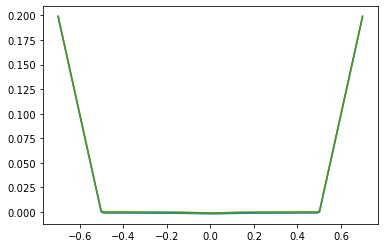

In [14]:
plot(xc.x, xc.y + sim.ymins[0])
plot(xc5.x, xc5.y)
plot(xc20.x, xc20.y)

In [12]:
sim.run_one_step()